<a href="https://colab.research.google.com/github/dongrekunal/RockvsMinePrediction/blob/main/Rock_vs_Mine_Prediction_system_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***`Creating Submarine prediction system of mines and rock`***

In [ ]:
import requests # request img from web
import shutil # save img locally
url = input('Please enter an image URL (string):') #prompt user for img url


Please enter an image URL (string):https://c8.alamy.com/comp/F2RE1B/leopard-2-a4-main-battle-tank-of-the-finnish-army-equipped-with-urdan-F2RE1B.jpg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Data Processing

In [ ]:
#Loading the dataset to pandas Dataframe
sonar_data = pd.read_csv('/content/sonar data.csv',header=None)
# See our csv file don't have any header name i.e column and row name which meas no header type so give it as none


Sonar_data is our dataframe which is reading csv files value

In [ ]:
sonar_data.head()


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
#number of rows and columns
sonar_data.shape

(208, 61)

In [ ]:
sonar_data.describe()  #describe --> statistical measures of the data


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


To see the values and their count

This are traditional methods now we are checking builtin functions



In [ ]:
a = sonar_data[60].values
print(a)

count = 0
for i in a:
  if i == "R":
    count+=1
print("R=",count,"M="+str(len(a)-count))



print("\n\nThis are now the advance versions")
sonar_data[60].value_counts()

['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']
R= 97 M=111


This are now the advance versions


M    111
R     97
Name: 60, dtype: int64

In [ ]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


--- 
Segragrate Data and label {Data are values except 60 column} and {Label are value at 60} 

---




In [ ]:
X = sonar_data.drop([60],axis=1)  # This is having all values except column 60
Y = sonar_data[60]
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

We are now separating values some is for train and other for test.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)                                                #X,Y are parameter we passed test_size means out of this 10% will be set for testing random_state is spliting factor
                                                # X_train is trianing input
                                                # Y_train are training labels


print("For X",X.shape)
print(X_train.shape)
print(X_test.shape)
print(X,Y)



print("For Y",Y.shape)
print(Y_train.shape)
print(Y_test.shape)


For X (208, 60)
(187, 60)
(21, 60)
         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...



---

Now we are selecting model

---



In [ ]:
model = LogisticRegression()





---

Here we are training model on basis of training data by using model fit

---



In [ ]:
# Fit the model according to the given training data.

model.fit(X_train, Y_train)


LogisticRegression()



---

Model Evaluation :- Checking how we are calculating output vs original o/p

---



In [ ]:
#Calculating accuracy using accuracy_score

# X_train_prediction is the output from or prediction from logistic model
X_train_prediction  = model.predict(X_train)
training_data_aaccuracy = accuracy_score(X_train_prediction,Y_train)
# Here we are calculating acc between predicted value from model vs actual values of label
print(training_data_aaccuracy)


# training_data_aaccuracy = accuracy_score()

0.8342245989304813


Now we are predicting values on test data

In [ ]:
X_testPrediction = model.predict(X_test)
# print(X_testPrediction) #This are predicted labels
# print(Y_test) #This is actual labels for test inputs
print(accuracy_score(X_testPrediction,Y_test))

0.7619047619047619




---
**This shows our model is 76% accurate so now we can create a system on this model**

---



[[0.0293 0.0644 0.039  0.0173 0.     0.0816 0.0993 0.0315 0.0736 0.086
  0.0414 0.0472 0.0835 0.0938 0.1466 0.0809 0.1179 0.2179 0.3326 0.3258
  0.2111 0.2302 0.3361 0.4259 0.4609 0.2606 0.0874 0.2862 0.5606 0.8344
  0.8096 0.725  0.8048 0.9435 1.     0.896  0.5516 0.3037 0.2338 0.2382
  0.3318 0.3821 0.1575 0.2228 0.1582 0.1433 0.1634 0.1133 0.0567 0.0133
  0.017  0.0035 0.0052 0.0083 0.0078 0.0075 0.0105 0.016  0.0095 0.0011]]
['R']
The object is Rock


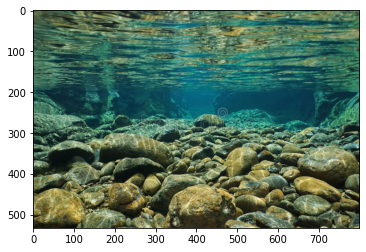

Image sucessfully Downloaded:  rocks-underwater-riverbed-clear-freshwater-dumbea-river-grande-terre-new-caledonia-82140586.jpg


In [ ]:
# System creation for random values by users:-



User_input = (0.0293, 0.0644, 0.039, 0.0173, 0.0, 0.0816, 0.0993, 0.0315, 0.0736, 0.086, 0.0414, 0.0472, 0.0835, 0.0938, 0.1466, 0.0809, 0.1179, 0.2179, 0.3326, 0.3258, 0.2111, 0.2302, 0.3361, 0.4259, 0.4609, 0.2606, 0.0874, 0.2862, 0.5606, 0.8344, 0.8096, 0.725, 0.8048, 0.9435, 1.0, 0.896, 0.5516, 0.3037, 0.2338, 0.2382, 0.3318, 0.3821, 0.1575, 0.2228, 0.1582, 0.1433, 0.1634, 0.1133, 0.0567, 0.0133, 0.017, 0.0035, 0.0052, 0.0083, 0.0078, 0.0075, 0.0105, 0.016, 0.0095, 0.0011)

# We will not use ordinary list just convert user given list into numpy list for faster operations 
# Just note will conversion convert in correct format how logistoic model here is utiziling features here are 60 features so pass 60 features through your array

NpListForUserInput = np.array(User_input).reshape(1,-1)
print(NpListForUserInput)

print(model.predict(NpListForUserInput))
if model.predict(NpListForUserInput) == "R":
  print("The object is Rock")

else:
  print("Stay away from here it's Mine")


# Displaying image for our prediction system 

from PIL import Image #To display downloaded img
import requests # to get image from the web
import shutil # to save it locally
# %pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


if model.predict(NpListForUserInput) == "R":
  image_url = 'https://thumbs.dreamstime.com/b/rocks-underwater-riverbed-clear-freshwater-dumbea-river-grande-terre-new-caledonia-82140586.jpg'
  filename = image_url.split("/")[-1]
  # open method used to open different extension image file
  img = mpimg.imread('/content/rocks-underwater-riverbed-clear-freshwater-dumbea-river-grande-terre-new-caledonia-82140586.jpg')
  imgplot = plt.imshow(img)
  plt.show()



else:
  image_url = "https://i.ytimg.com/vi/0tXx-aBQbn4/maxresdefault.jpg"
  filename = image_url.split("/")[-1]
  img = mpimg.imread('/content/maxresdefault.jpg')
  imgplot = plt.imshow(img)
  plt.show()

  


# Open the url image, set stream to True, this will return the stream content.
r = requests.get(image_url, stream = True)

# Check if the image was retrieved successfully
if r.status_code == 200:
    # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
    r.raw.decode_content = True
    
    # Open a local file with wb ( write binary ) permission.
    with open(filename,'wb') as f:
        shutil.copyfileobj(r.raw, f)
        
    print('Image sucessfully Downloaded: ',filename)
else:
    print('Image Couldn\'t be retreived')



